In [34]:
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.helper_functions import load_data

In [9]:
df, _ = load_data('data')

In [10]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [11]:
df.dtypes

f_00      float64
f_01      float64
f_02      float64
f_03      float64
f_04      float64
f_05      float64
f_06      float64
f_07        int64
f_08        int64
f_09        int64
f_10        int64
f_11        int64
f_12        int64
f_13        int64
f_14        int64
f_15        int64
f_16        int64
f_17        int64
f_18        int64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23      float64
f_24      float64
f_25      float64
f_26      float64
f_27       object
f_28      float64
f_29        int64
f_30        int64
target      int64
dtype: object

In [12]:
df_numeric = df.select_dtypes(exclude=['object'])
df_X_numeric = df_numeric.drop(columns=["target"])
df_X_float = df_X_numeric.select_dtypes(exclude=['int64'])
df_X_int = df_X_numeric.select_dtypes(exclude=['float64'])
df_X = df.drop(columns=["target"])

In [16]:
def get_correlated_pairs(numerical_df, lower_thresh: float, upper_thresh: float):
    """
    Returns list of tuples for feature pairs with absolute correlation values greater than the threshhold
    """
    correlations = numerical_df.corr()
    flattened = correlations.stack()
    return flat_df[(flattened > upper_thresh) | (flattened < lower_thresh)].index.to_list()     

In [26]:
def plot_feature_pairs(df, feature_pairs: List[tuple]):
    """Plots """
    for pair in feature_pairs:
        if pair[0] == pair[1]:
            continue 
        sns.scatterplot(data=df, x=pair[0], y=pair[1], hue="target").set(title=f"{pair[0]} - {pair[1]}")
        plt.show()

In [72]:
correlations = df_X_numeric.corr()
flatened = correlations.stack()

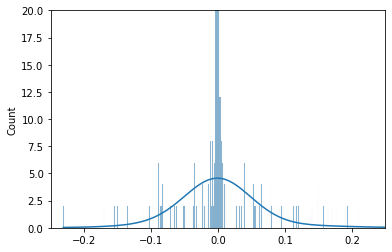

In [73]:
#distribution of correlation values
hist = sns.histplot(flat_df, kde=True)
hist.set(xlim=(-0.25, 0.25))
hist.set(ylim=(0, 20))
plt.show()

In [57]:
correlated_pairs = get_correlated_pairs(df_X_numeric, -0.15, 0.15)
print(len(correlated_pairs) - 30)

28


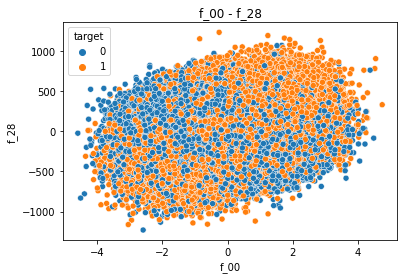

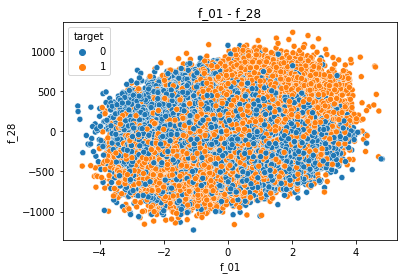

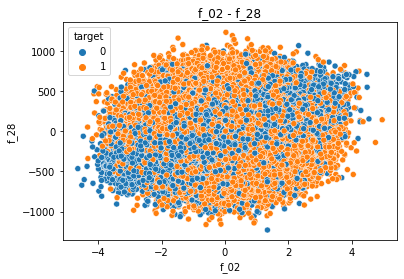

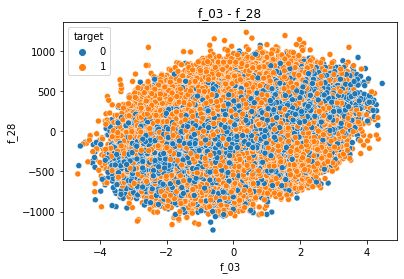

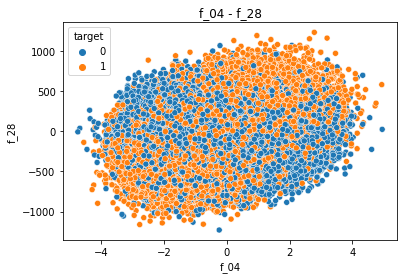

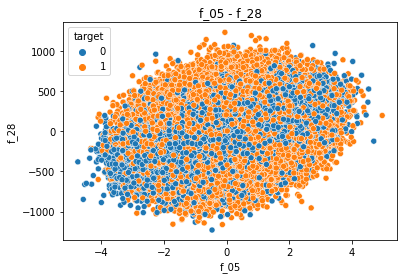

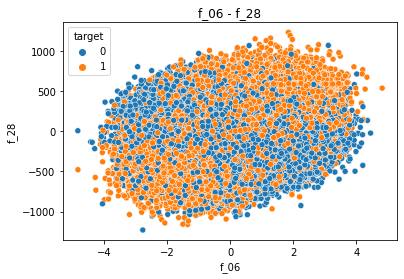

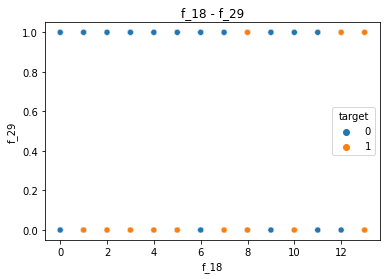

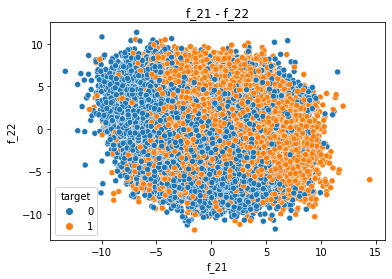

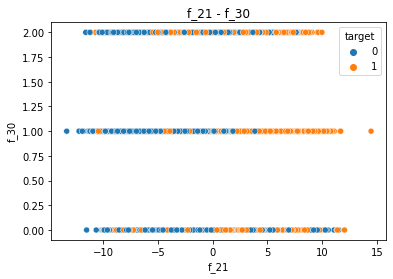

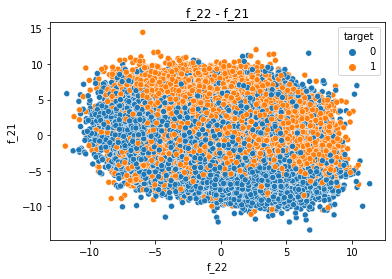

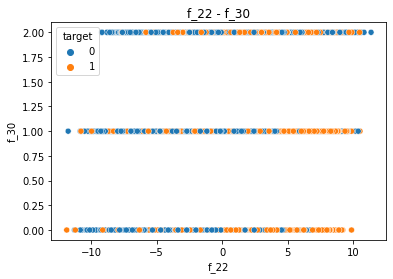

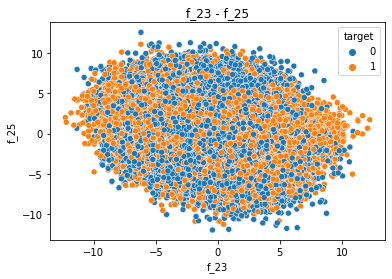

/home/agb/projects/kaggle/kaggle_tabular_playground_2022_05/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


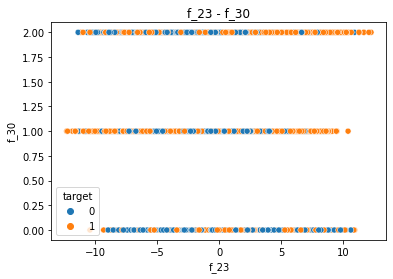

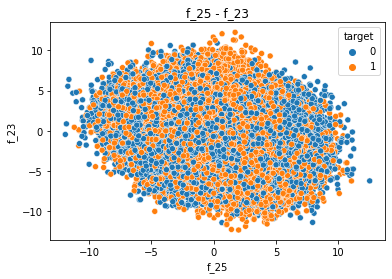

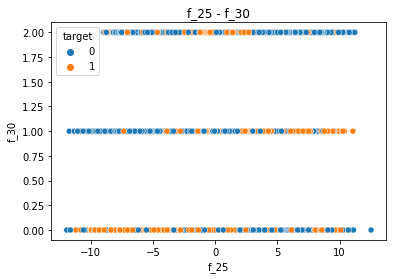

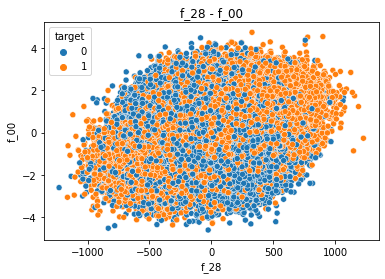

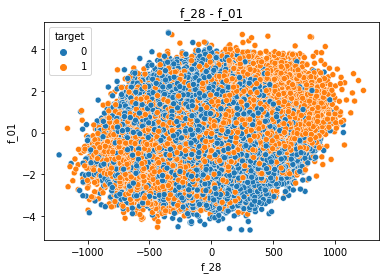

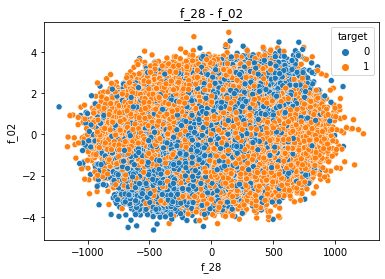

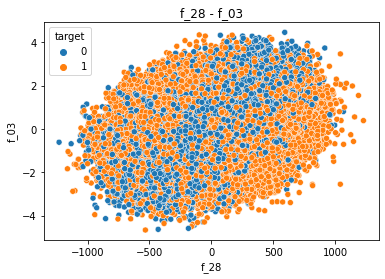

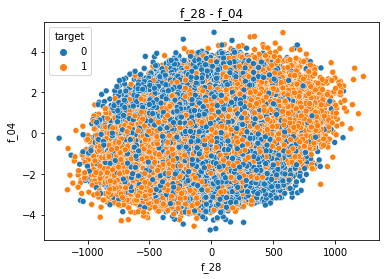

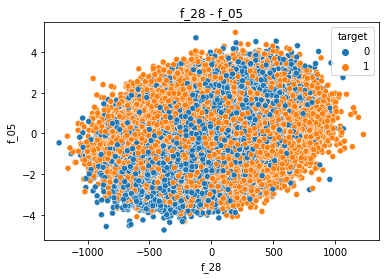

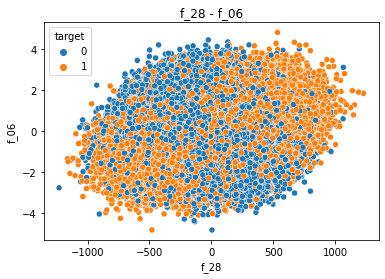

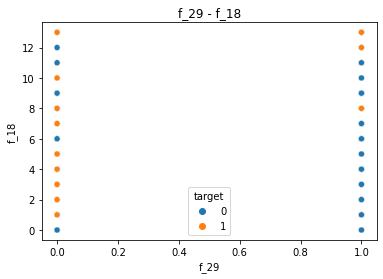

/home/agb/projects/kaggle/kaggle_tabular_playground_2022_05/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


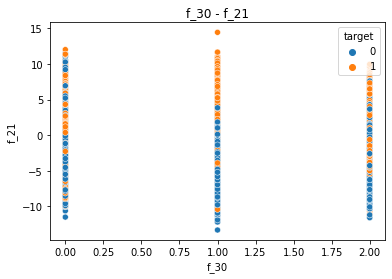

/home/agb/projects/kaggle/kaggle_tabular_playground_2022_05/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


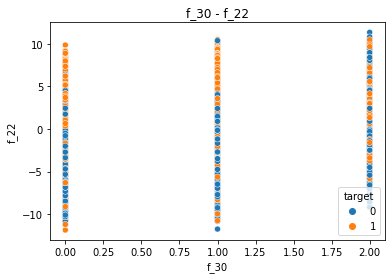

/home/agb/projects/kaggle/kaggle_tabular_playground_2022_05/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


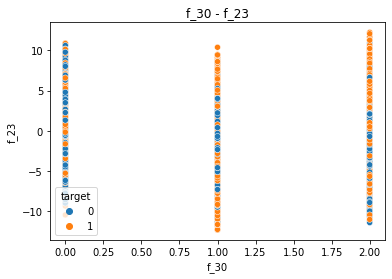

/home/agb/projects/kaggle/kaggle_tabular_playground_2022_05/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


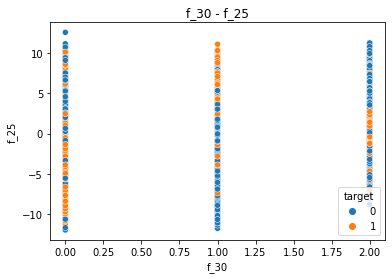

In [74]:
plot_feature_pairs(df, correlated_pairs)

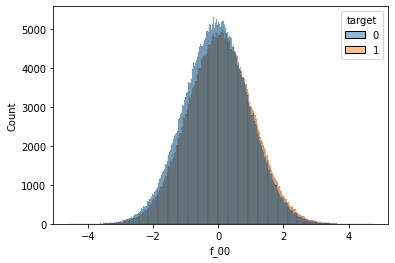

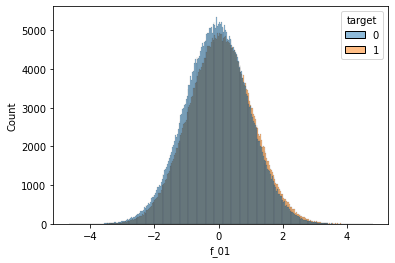

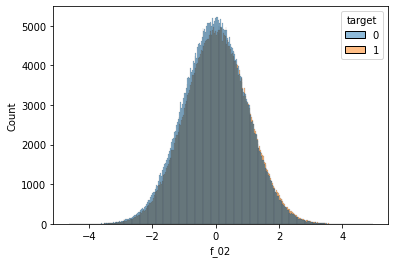

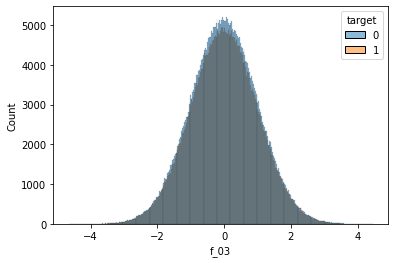

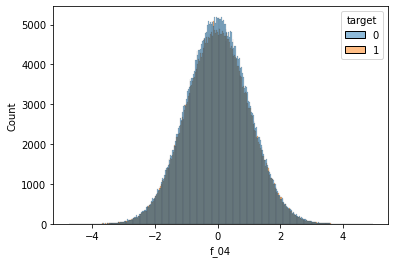

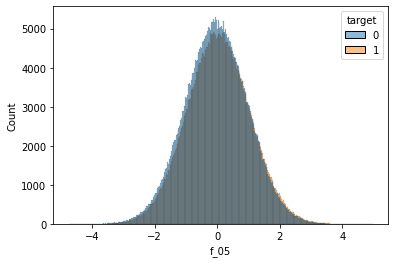

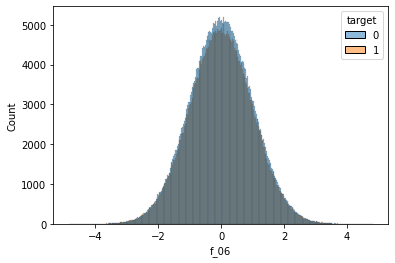

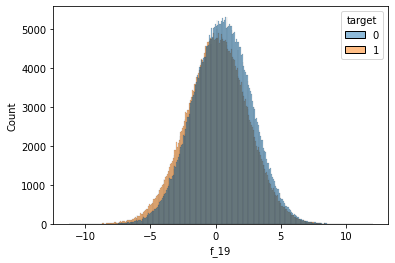

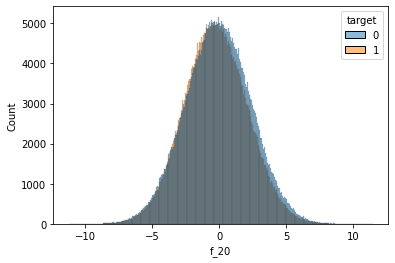

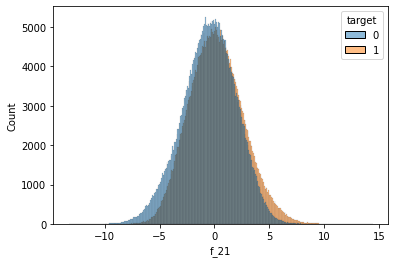

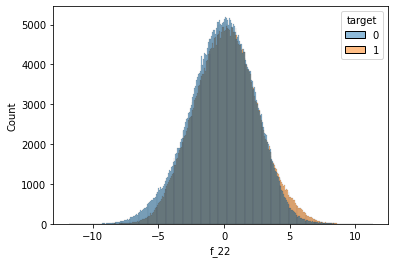

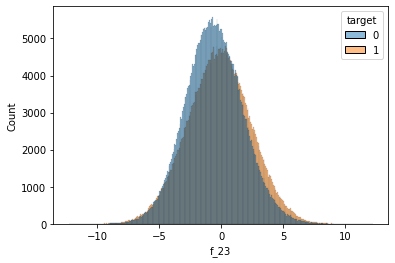

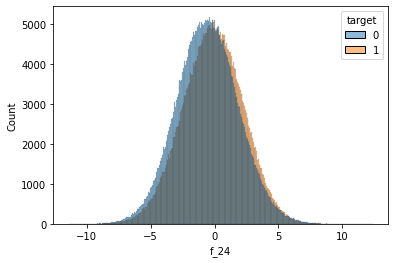

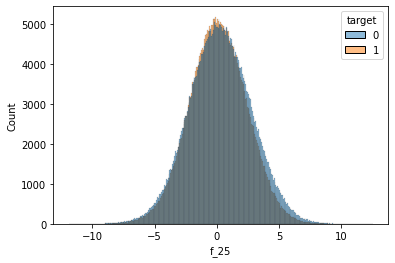

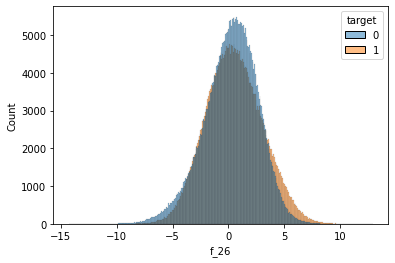

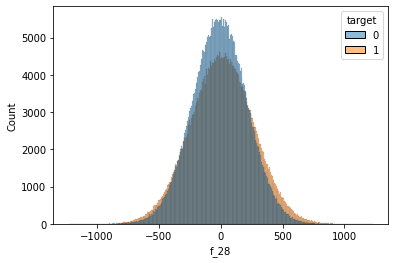

In [10]:
# histograms for all numeric features
for col in df_X_float:
    sns.histplot(data=df_numeric, x=col, hue="target")
    plt.show()